### Initial Example ###
Below is an *example* of what we can do with Twitter and Word Clouds

The image at the bottom is based on the following:
- 100 Popular tweets including the following
    - @HowardU
    - #hu
    - #howardu
- Tweets starting from February 21, 2020
- Did some data cleaning, but will need to do it better
    - As you can see, I have lost things like "Black History Month" because I cleaned the data so that each individual word was populated in a list (rather than the entire tweet)

**Note** - I removed my actual login information. If you'd like to try this you can create a Twitter developer account. Otherwise, there is a limit on total searches, so I didn't want us to hit the limit doing practice using just one account.

In [1]:
#Importing things we will need. 
#There may be some extras since I was playing around with other ways to do this
import os
import tweepy as tw
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from IPython.display import Image as im

In [2]:
#Unique keys associated with the twitter account (I have removed them for the time being)
consumer_key= 'Unique Consumer Key'
consumer_secret= 'Unique Consumer Secret'
access_token= 'Individual Access Token'
access_token_secret= 'Individual Token Secret'

In [3]:
#Background needed for Tweepy to work
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [4]:
#Selecting word type and when we want to start the search
search_words = "@howardu" or "#hu" or '#howardu'
date_since = "2020-02-21"

In [5]:
#Creating the initial item
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="en", result_type = 'popular',
              since=date_since).items(100)
tweets

In [6]:
#Creating an initial list
tweetls=[]
for tweet in tweets:
    tweetls.append(tweet.text)

In [7]:
#Cleaning the tweets
raw_string = ''.join(tweetls)
no_links = re.sub(r'http\S+', '', raw_string)
no_unicode = re.sub(r"\\[a-z][a-z]?[0-9]+", '', no_links)
no_special_characters = re.sub('[^A-Za-z ]+', '', no_unicode)

In [8]:
#Splitting if there is a space (can try without this as well)
words = no_special_characters.split(" ")
# Filtering to ignore a, an, be, ...
words = [w for w in words if len(w) > 2]
#Making everything lowercase
words = [w.lower() for w in words]
#List creation
words = [w for w in words if w not in STOPWORDS]

In [9]:
#Checking to make sure we are populating a list
words[0:10]

['ready',
 'send',
 'howardu',
 'students',
 'sites',
 'community',
 'service',
 'spring',
 'break',
 'raising']

In [10]:
#Populating the WordCloud
wc = WordCloud(background_color="black", max_words=2000,stopwords = ['howardu','thread'])
clean_string = ','.join(words)
wc.generate(clean_string)

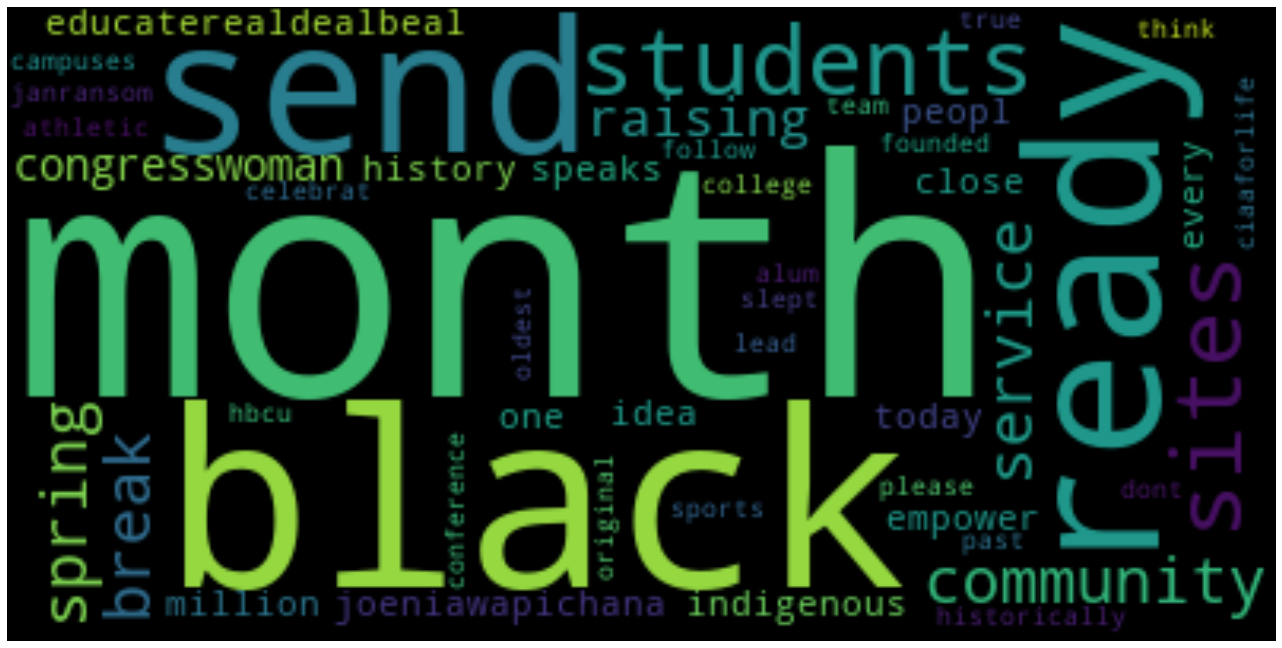

In [11]:
#Showing image
f = plt.figure(figsize=(50,50))
f.add_subplot(1,2, 2)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()